interactive(children=(FloatSlider(value=0.3, description='alpha', max=1.0, min=-1.0, step=0.05), Output()), _d…

interactive(children=(FloatSlider(value=0.8, description='beta', max=1.0, min=-1.0, step=0.05), Output()), _do…

interactive(children=(FloatSlider(value=0.5, description='freq_penalty', max=1.0, min=-1.0, step=0.05), Output…

Text(value='', description='keywords:', layout=Layout(width='15cm'), placeholder='')

Button(description='Run!', style=ButtonStyle(button_color='lightgreen'))

prompt words: ['cloudy', 'meteorology']
Hub nodes num: 2, Total nodes num: 26
hub words: ['cats', 'voice']

calculating distance to hub "cats"
calculating distance to hub "voice"
-----drawing network-----
promt_sentence: The meteorology report said that the clouds would move out by noon.


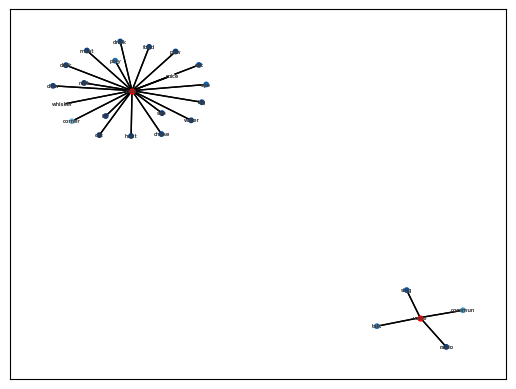

In [1]:
from ipywidgets import interact, interactive, fixed, Text, Layout, Button, Output, HBox, VBox, FloatSlider
from IPython.display import display
from prompt import *
from local_kg import *
import argparse
from datetime import datetime
import sys
import logging

alpha_ =0.3
beta_ =0.8
freq_pen = 0.5

def set_alpha(alpha):
    alpha_ = alpha

def set_beta(beta):
    beta_ = beta
    
def set_freq_pen(freq_penalty):
    freq_pen = freq_penalty

interact(set_alpha, alpha=FloatSlider(min=-1.0, max=1.0, step=0.05, value=0.3))
interact(set_beta, beta=FloatSlider(min=-1.0, max=1.0, step=0.05, value=0.8))
interact(set_freq_pen, freq_penalty=FloatSlider(min=-1.0, max=1.0, step=0.05, value=0.5))

inp = Text(placeholder='', description='keywords:', layout = Layout(width='15cm'))
button = Button(description='Run!')
button.style.button_color = 'lightgreen'
display(inp)
display(button)

if not os.path.isdir('logs/'):
    os.mkdir('logs/')
filename = datetime.now().strftime('log_%Y%m%d_%H_%M.log')

logFormatter = logging.Formatter("%(levelname)s-%(asctime)s  %(message)s")
logger = logging.getLogger("requests")
logger.setLevel(logging.INFO)

# fileHandler = logging.FileHandler('logs/'+filename)
# fileHandler.setFormatter(logFormatter)
# rootLogger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler(sys.stdout)
consoleHandler.setFormatter(logging.Formatter(""))
logger.addHandler(consoleHandler)

def onchange(b):
    kw_list = str(inp.value).strip().split(',')

    promt_sentence = promptGeneration(logger, kw_list)

    path, hubs, stem_to_words, nei_to_hub = build_kg(kw_list=kw_list)
    final_score = calculate_score(logger, path, hubs, stem_to_words, nei_to_hub, alpha_)

    story = gpt3_generation(logger, promt_sentence, final_score, stem_to_words, beta_, freq_pen)
    
    logger.info(f"promt_sentence: {promt_sentence}")
    
    box_layout= {
            'width': '40%',
            'height': '400px',
            'border': '1px solid black'
        }
    
    text1 = Output(layout=box_layout)
    text2 = Output(layout=box_layout)
    box = HBox([text1, text2])
    
    display(box)
    with text1:
        print(story)

    gpt3_story = original_gpt3(logger, kw_list)
    
    with text2:
        print(gpt3_story)

button.on_click(onchange)